# Lab 5 - Exploratory Data Analysis

In [1]:
%matplotlib inline

## General Instructions

In this course, Labs are the chance to applying concepts and methods discussed in the module.
They are a low stakes (pass/fail) opportunity for you to try your hand at *doing*.
Please make sure you follow the general Lab instructions, described in the Syllabus.
The summary is:

* Discussions should start as students work through the material, first Wednesday at the start of the new Module week. 
* Labs are due by Sunday. 
* Lab solutions are released Monday.  
* Post Self Evaluation and Lab to Lab Group on Blackboard and Lab to Module on Blackboard on Monday.

The last part is important because the Problem Sets will require you to perform the same or similar tasks without guidance.
Problem Sets are your opportunity to demonstrate that you understand how to apply the concepts and methods discussed in the relevant Modules and Labs.

## Specific Instructions

1.  For Blackboard submissions, if there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.

    * do **not** use absolute paths in your notebooks. All resources should located in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    * do **not** return files provided by us (data files, .py files)


2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

## Exploratory Data Analysis

In this Module, we partitioned the problem of EDA using a taxonomy with the following characteristics:

* **Data Type**: Numerical or Categorical.
* **Number of Variables**: 1 or many.
* **Technique**: descriptive statistics, tables or charts.

we will skip "goal" for now.

And we came up with a general set of tools for analyzing data, not all of them applicable to all the cases:

* Descriptive Statistics
* Frequency Table (absolute and relative)
* Histograms
* Boxplots Plot
* Bar chart
* Dot chart
* Heat map
* Scatter Plot

This does not exhaust all the chart types, though. We also have the following basic chart types that we talked about in the Visualization Module:

* Points
* Lines
* Lines and points

The goal for this lab is to get you acquainted with most of these tools by analyzing a real data set. You *must* follow the framework discussed in the Module for a *methodical* EDA:

1. Single Variable Exploration.
2. Exploration of Pairwise Relationships.

Each and every analysis (of a single variable or a pair of variables) should follow the general pattern of discuss/code/discuss. If you need examples for EDA, look at the Example in *Fundamentals*. 

In order to guide the EDA, you can take the following as the main question:

> What are the factors influencing charges?

Using that problem as a guide, explore 5 pairwise relationships. Because you have a question, you should *not* use correlations as a *guide* to exploration (however, correlation coefficients are still reasonable descriptive statistics for two numeric variables).

As you explore those pairings, questions will arise, "I wonder if...." or "I wonder about...". Make note of them. **Do not get distracted**. As a rough guide, you should get three (3) questions out of every single or pairwise exploration. As a result, you should have at least 15 of them when you're done (plus all the questions you generated looking at each variable individually!).

Pick five (5) of *those* questions and answer them.

And for each case, try different visualizations. What does a histogram tell you that a box-and-whiskers plot does not and vice versa? What about different bin sizes? And the most important bit: you must write something for every single chart you produce. 

The emphasis here is on *science*.

At every juncture, you must say:

1. **Why am I trying this?** "I'm going to look at this data using a box and whiskers plot to explore its general shape." "I am trying more bins to see if the histogram reveals any interesting characteristics."
2. **Do it.**
3. **What did I learn?** "Although I know the data is generated from a normal distribution, it doesn't look normally distributed. The sample mean is X while the true mean is Y."

BTW, do not literally say "Why am I doing this?"...these questions are just *prompts* or *scaffolding*.

For now, you shouldn't just "change" anything. Let's say you start with 10 bins in your histogram. You decide you want to see what happens with 20. **Do not just change the value to 20**. Instead, make a new histogram with 20 bins, documenting why you thought 20 bins might be better, what you hoped to see, and then what you saw as a result of doing it.

(Believe me, there will be a time when a boss says "did you try 10 bins?" and you'll say "yes" but you won't remember what it looked like or they'll want to see it and you'll have to do it all again anyway. Your notebook is a documentation of *everything* you tried.)

Be inventive and creative.

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
import eda
import scipy.stats as stats


sns.set(style="whitegrid")

# Answer

Use this link to get the data:

```
insurance = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/insurance.csv")
```

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/insurance.csv")

We can start by getting the info for this data set.

In [4]:
insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see we have 7 categories, as expected. There don't seem to be any missing values. Age, bmi, children, and charges seem to be numeric variables, and sex, smoker, and region are not. We will discuss each one at a time. 

Let's first take a look at the first 5 entries in the dataframe

In [5]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We can see we have the categories __Age__, __Sex__, __bmi__, __Children__, __Smoker__, __Region__, and __Charges__.

$Age$

Let's start our single variable analysis by first looking at __Age__. We know this is a numeric variable, and that traditionally, insurance charges will increase as you get older. 

In [6]:
age = pd.DataFrame(insurance['age'].describe())
print(tabulate(age, headers=['Age'], floatfmt='.0f'))

         Age
-----  -----
count   1338
mean      39
std       14
min       18
25%       27
50%       39
75%       51
max       64


We can see the mean age is 39, the min is 18, and max is 64. This appears normal, we have data for when people turn 18 and become 'adults', and stop looking at insurance charges when someone turns 65, which is when insurance rates are sure to increase. The median is the same as the mean, 39, which suggests a symmetric distribution.

Let's look at the histogram/box-and-whiskers plot for Age to visualize it.

Freeman Diaconis for age: 11 bins


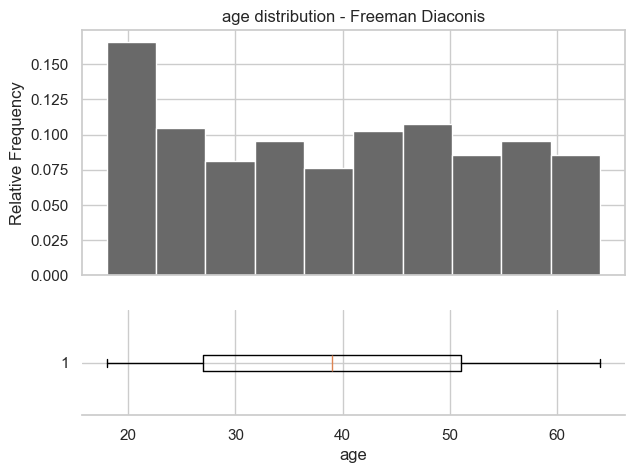

In [7]:
eda.histogram_w_whiskers(insurance, 'age')

We see a higher population toward the low end of the spectrum, but otherwise a pretty even dispersion of Age here. There don't seem to be any extreme or unwarrented values.

We can also look at the histogram trio, since this is a numeric variable after all. We will be able to see if changing the bin size helps us see if any patterns arise for this variable.

Freeman Diaconis for age: 11 bins


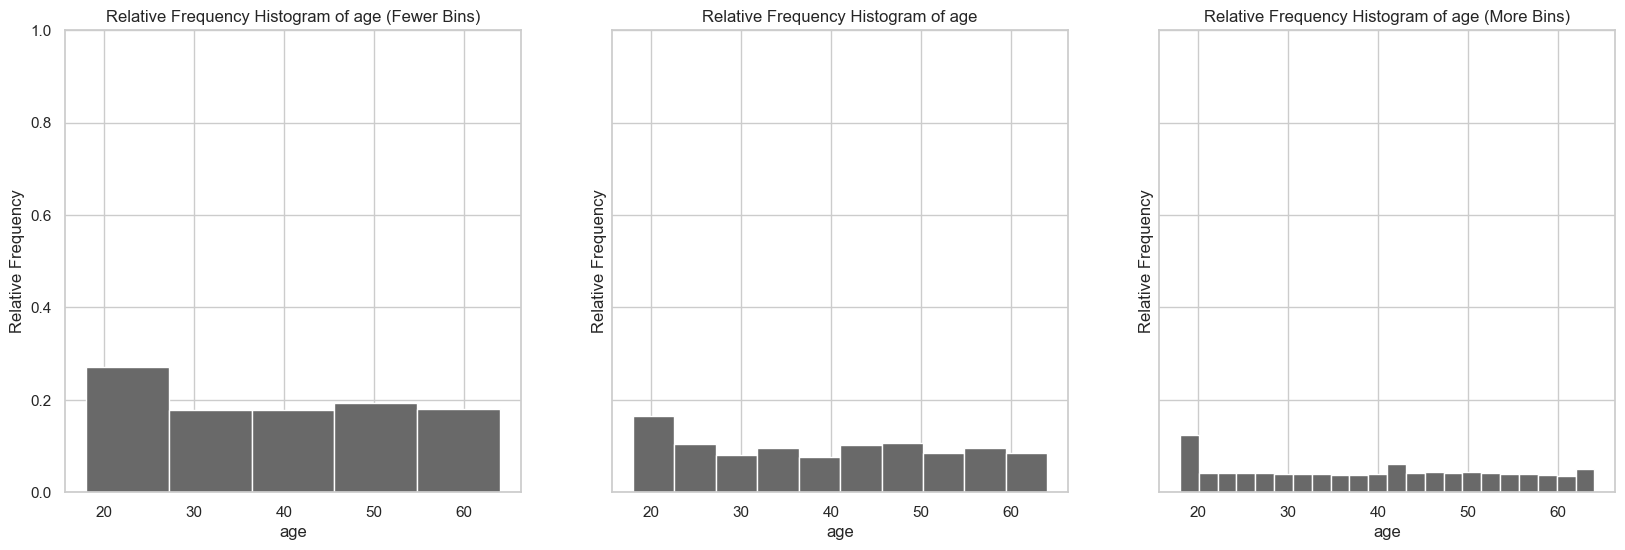

In [8]:
eda.histogram_trio(insurance, 'age')

A little hard to see, but with the right-most plot using more bins, we can see a small spike in the 42-44 age range, as well as at the end for 62-64 roughly. We still have the highest proportion of people between 18-20, while the other ages seem fairly even. Why is there a spike in the 42-44 range though?

$Sex$

Next we can look at sex. First I will check how many different values we have in this category, I am expecting just 2, male and female.

In [9]:
sexes = insurance['sex'].unique()
data = []
for sex in sexes:
    data.append([sex])

print(tabulate(data, headers=['Sex']))

Sex
------
female
male


So we do indeed only have 2 for the sake of this analysis. Let's look at the proportion of each value.

In [10]:
pd.DataFrame(insurance['sex'].value_counts(normalize=True).sort_index())

,proportion
sex,
female,0.494768
male,0.505232


About 49% female and 51% male, pretty nearly split right down the middle. I don't think a chart is super necessary here, as we only have 2 values here that are almost evenly split. It will be more interesting to look at this variable when doing our pairwise analysis.

$bmi$

Next we have body mass index (bmi), which is a measure of body fat based on a person's weight and height. Personally, I don't like looking at bmi, as it can be inaccurate for people with a lot of muscle mass or for any number of other reasons. In any case it is worth looking at here in relation to charges, which we will get to later. Bmi is a numeric variable, with most people falling between the 18.5 - 30.0 range. Let's take a look at some descriptive statistics. 

In [11]:
bmi = pd.DataFrame(insurance['bmi'].describe())
print(tabulate(bmi, headers=['Bmi'], floatfmt='.2f'))

           Bmi
-----  -------
count  1338.00
mean     30.66
std       6.10
min      15.96
25%      26.30
50%      30.40
75%      34.69
max      53.13


We see a mean of 30.66, min of 15.96 (classified as underweight) and max of 53.13 (classified as morbidly obese). The third quartile range is 34.69 however, so we expect the distribution to show a skew to the right.

Let's look at some charts to visualize this.

Freeman Diaconis for bmi: 25 bins


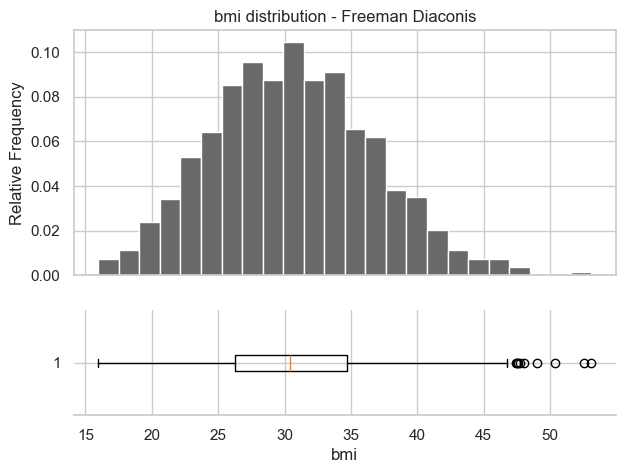

In [12]:
eda.histogram_w_whiskers(insurance, 'bmi')

We see a fairly symmetric chart here, but we do have quite a few extreme values in the 47-55 range. Again, let's take a look at the trio histograms.

Freeman Diaconis for bmi: 25 bins


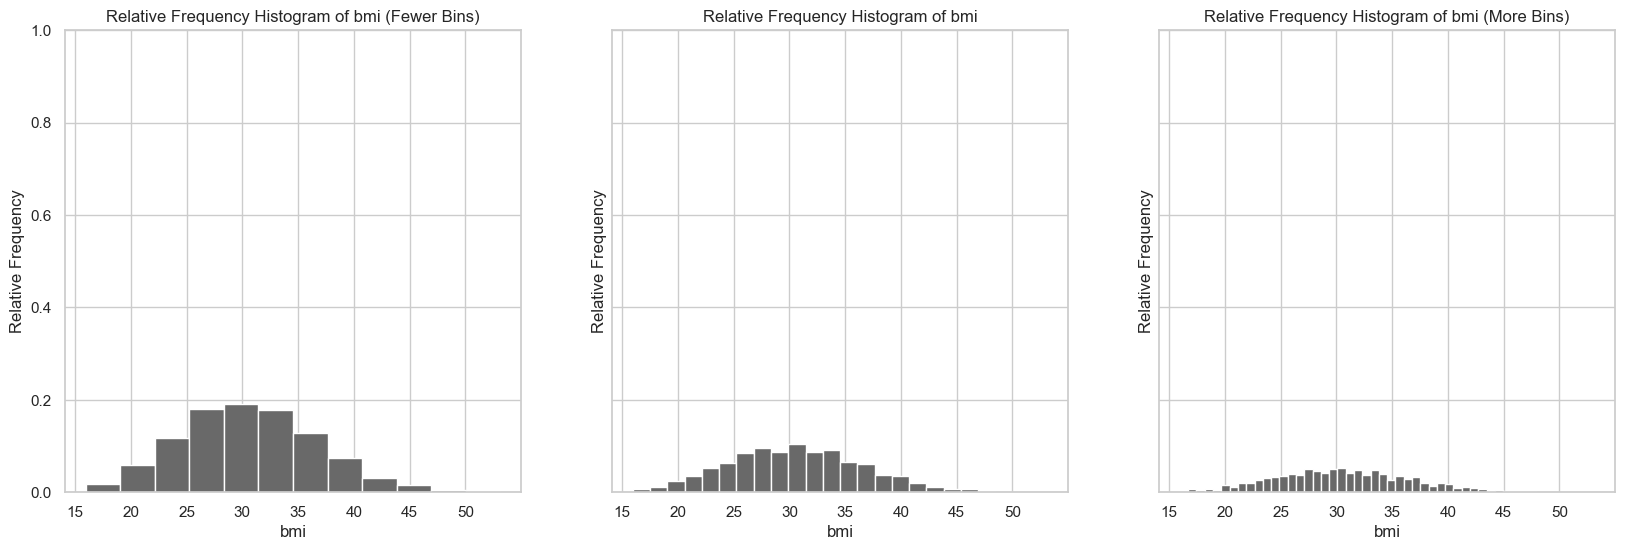

In [13]:
eda.histogram_trio(insurance, 'bmi')

I don't see anything too unusual here, when comparing each histogram to each other. As we expect, the distribution is still symmetric, and there aren't any obvious patterns by changing the bins size, as far as I can tell. How does age affect bmi?

$Children$

Here we have number of children, which I take to mean dependents when looking at health insurance, which typically increases charges. This is a numeric variable, but we can also treat it as categorical. Let's look at descriptive statistics again, noting that there will be an upper limit to how many children one family can have.

In [14]:
children = pd.DataFrame(insurance['children'].describe())
print(tabulate(children, headers=['Children'], floatfmt='.0f'))

         Children
-----  ----------
count        1338
mean            1
std             1
min             0
25%             0
50%             1
75%             2
max             5


So the mean and median are both 1, the min is 0, and the max is 5. Nothing unusual to note here, as we were not expecting a large range of values, and each value must be discrete. Why don't we take a look at the proportions of each value next.

In [15]:
pd.DataFrame(insurance['children'].value_counts(normalize=True).sort_index())

,proportion
children,
0,0.428999
1,0.242152
2,0.179372
3,0.117339
4,0.018685
5,0.013453


We can see about 43% of people have no children, while the people who have only 1 child is neary half of that. The proportion gets smaller as the number of children increase. We expect this distribution to be right skewed.

Let's look at our famous two charts, starting with the histogram/box-and-whisker plot combo.

Freeman Diaconis for children: 14 bins


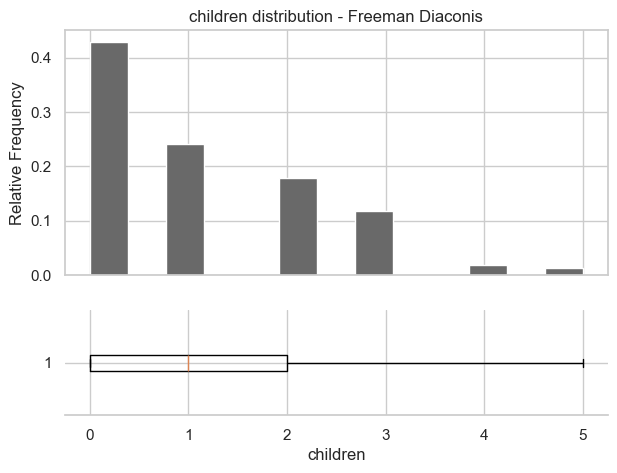

In [16]:
eda.histogram_w_whiskers(insurance, 'children')

We see a right skewed distribution once again, which logically makes sense. Anecdotally, most families I've met have had no more than 3 children. Do other factors, such as income level, affect how many children a person might have?

Here we have the trio histograms.

Freeman Diaconis for children: 14 bins


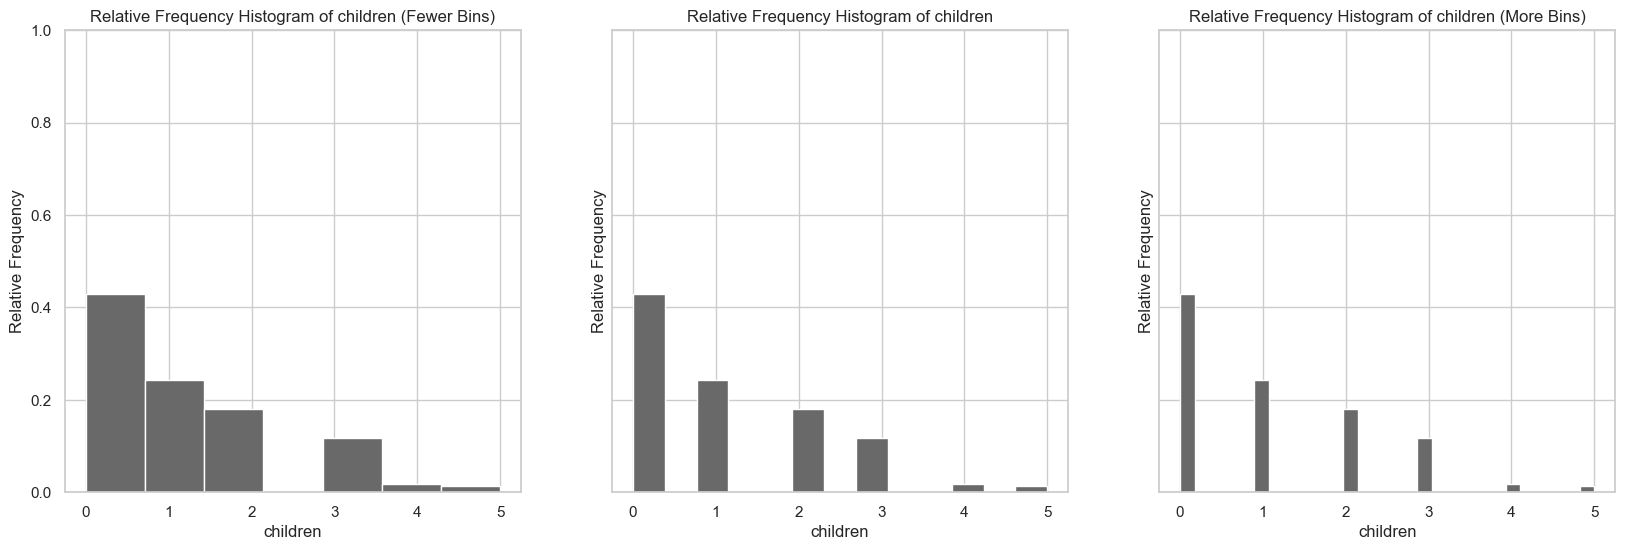

In [17]:
eda.histogram_trio(insurance, 'children')

Again, nothing unusual here. We see what we expect to see. It would be interesting to look at the relationship between age and number of children.

$Smoker$

Smoker is a categorical variable, and like sex, I expect it to only have 2 values, 'yes' or 'no'. Let's check.

In [18]:
smokers = insurance['smoker'].unique()
data = []
for value in smokers:
    data.append([value])

print(tabulate(data, headers=['Smoker?']))

Smoker?
---------
yes
no


So it looks correct, there are only two values for this categorical variable. Realistically, we could offer more choices here, by perhaps looking at people who smoke conditionally, like when drinking. Would smokers have higher charges because they might be more likely to engage in other vices as well? Again, for the sake of this analysis, let's consider only these two options.

Let's look at the proportions.

In [19]:
pd.DataFrame(insurance['smoker'].value_counts(normalize=True).sort_index())

,proportion
smoker,
no,0.795217
yes,0.204783


We have almost 80% of people who do not smoke, and 20% of people who do. I expect when we do pairwise analysis, that smokers will have higher charges. I don't think a chart is necessary here for only 2 values, as we can easily imagine what an 80/20 split bar chart could look like, for example.

$Region$

Region is another categorical variable. Let's take a look at what values we have in this category.

In [20]:
regions = insurance['region'].unique()
data = []
for value in regions:
    data.append([value])

print(tabulate(data, headers=['Region']))

Region
---------
southwest
southeast
northwest
northeast


Only 4 values here, but more interesting I think than a binary variable. Next we can look at the proportions for each region. Assuming this data is from the U.S., I expect a higher proportion of people from more densely populated areas, such as the northeast and southwest.

In [21]:
pd.DataFrame(insurance['region'].value_counts(normalize=True).sort_index())

,proportion
region,
northeast,0.242152
northwest,0.242900
southeast,0.272048
southwest,0.242900


We see an almost even spread of roughly 25% in each region, noting that the southeast region is slightly higher, at 27%. We can create a vertical bar chart here to visualize this.

Text(0.5, 1.0, 'Proportions of People, by Region')

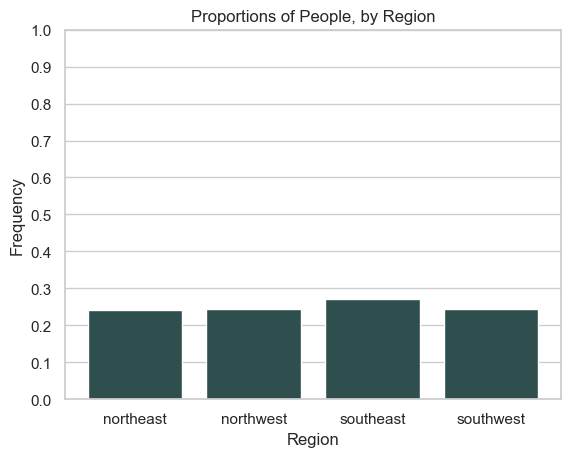

In [22]:
counts = insurance['region'].value_counts(normalize=True).sort_index()
regions = pd.Series(insurance['region'].unique()).sort_values()

plt.bar(regions, counts, color='darkslategray')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.yticks(ticks=np.arange(0,1.1, 0.1))
plt.grid(axis='x')
plt.title('Proportions of People, by Region')

Again not very interesting, but we see the same thing as in the tables from before.

$Charges$

Our last variable is charges. It is numeric, and I expect a wide range of values, since this is our 'target' essentially, and will depend on most, if not all, of the other variables in our dataframe.

Let's start with the descriptive statistics.

In [23]:
charges = pd.DataFrame(insurance['charges'].describe())
print(tabulate(charges, headers=['Charges'], floatfmt='.2f'))

         Charges
-----  ---------
count    1338.00
mean    13270.42
std     12110.01
min      1121.87
25%      4740.29
50%      9382.03
75%     16639.91
max     63770.43


We have a mean of 13,270.42, a min of 1121.87, and a max of 63,770.43. The third quartile range is 16.639.91, so we once again expect a right skewed distribution. The median is slightly lower than the mean as well.

Here we can see the histogram and box-and-whisker plot.

Freeman Diaconis for charges: 29 bins


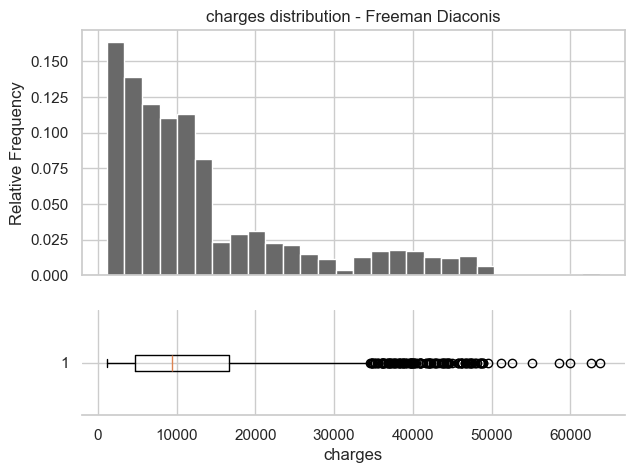

In [24]:
eda.histogram_w_whiskers(insurance, 'charges')

Now this is interesting. We definitely have a largely right skewed distribution, as predicted. We have several extreme values here, from about 35,000+, but most people's charges are on the lower side. Next we will look at the trio histograms.

Freeman Diaconis for charges: 29 bins


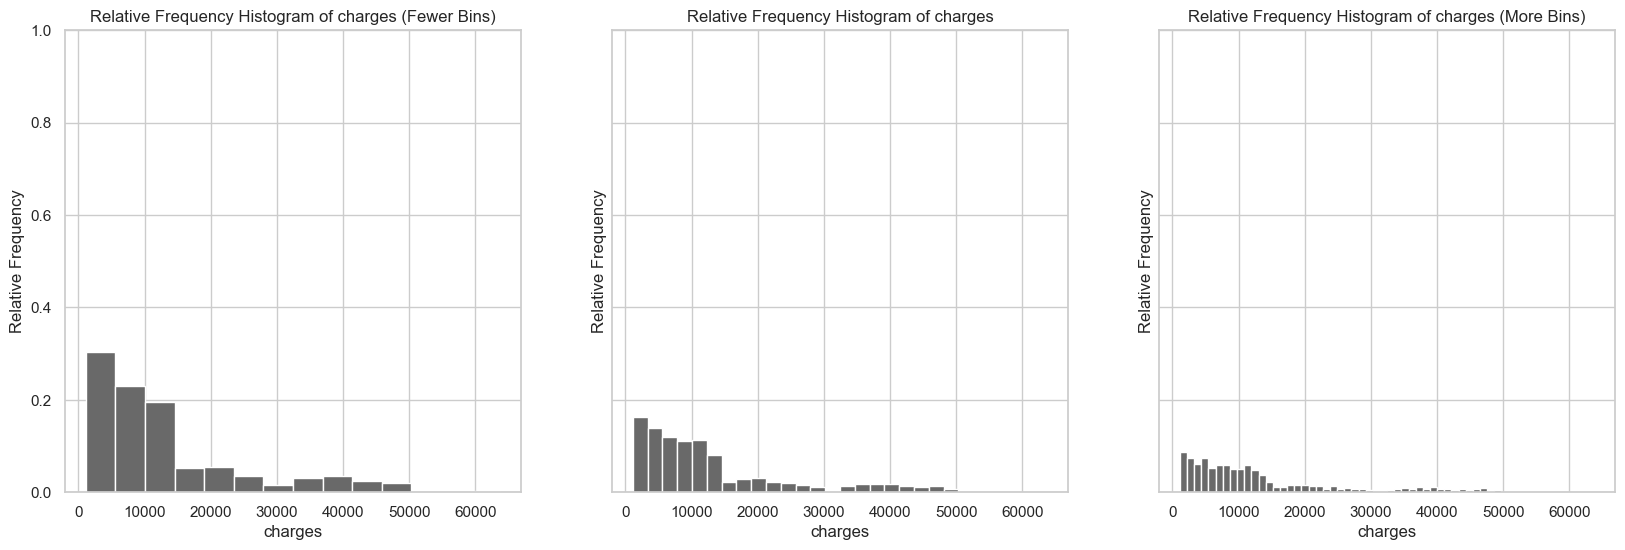

In [25]:
eda.histogram_trio(insurance, 'charges')

Hard to see, but I don't note anything too unusual here, that we couldn't see from the first chart. Before looking into several pairwise relationships, we note that the standard deviation for this category is 12,110.01, almost as much as the mean (13,270.42).

$Pairwise Relationships$

$Age$ vs $Children$

Here, we want to take a look at how a person's age affects how many children they have. I expect that people on the younger side (< 30 years old) will have less children than people who are in their 40s and 50s. Because age has a wide range of values (as we saw in the single variable EDA), I will create bins of 10 years for each age group so the data is easier to look at.

In [26]:
insurance['age_group'] = (insurance['age'] // 10) * 10

Now since age group is numeric (but kind of categorical as well), and children is numeric, we can use small multiples to look at how children is influcenced by age.

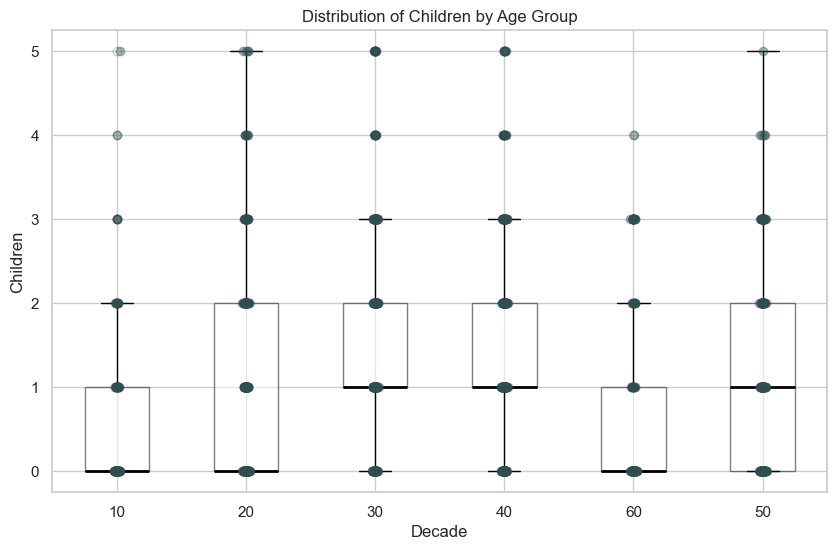

In [28]:
grouped = insurance.groupby('age_group')

figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1,1,1)
labels = pd.unique(insurance['age_group'].values)

grouped_data = [grouped['children'].get_group(k) for k in labels]
patch = axes.boxplot(grouped_data, labels=labels, patch_artist=True, zorder=1)
eda.restyle_boxplot(patch)

for i, k in enumerate(labels):
    subdata = grouped['children'].get_group(k)
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(x, subdata, 'o', alpha=0.4, color='darkslategray', zorder=2)

axes.set_xlabel('Decade')
axes.set_ylabel('Children')
axes.set_title('Distribution of Children by Age Group')

plt.show()
plt.close()

Maybe not the best choice of visualization for these two variables, but we can sort of see that the median for age groups 30, 40, and 50 are about 1, and age groups 10 and 60 show a lower range in number of children. It appears that as people get older, the number of children they have increases up to the 60s age group. Why does number of children decrease after 60? Why do 20 and 50 have the largest ranges, and not 30 or 40? Are there other factors in our dataset that might influence number of children?

$Sex$ vs $Charges$

Now let's look at how sex might influence charges. We know we only have 2 values for sex, male or female. I predict we will see that on average, men have higher charges than women. Again we have a catergorical and numeric variable to compare.

In [29]:
sexes = insurance.groupby('sex')
data = sexes['charges'].describe().transpose()
data

sex,female,male
count,662.000000,676.000000
mean,12569.578844,13956.751178
std,11128.703801,12971.025915
min,1607.510100,1121.873900
25%,4885.158700,4619.134000
50%,9412.962500,9369.615750
75%,14454.691825,18989.590250
max,63770.428010,62592.873090


So we have a higher mean for males as well as a higher third quartile range, so it does appear that men will have higher charges than women. Again we can try multiple box plots here to view these differences.

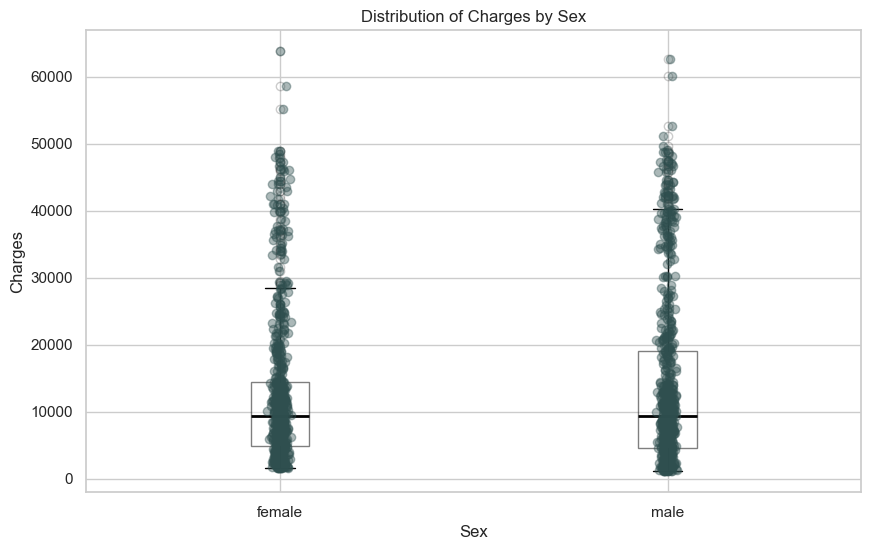

In [30]:


figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1,1,1)
labels = pd.unique(insurance['sex'].values)

grouped_data = [sexes['charges'].get_group(k) for k in labels]

patch = axes.boxplot(grouped_data, labels=labels, patch_artist=True, zorder=1)
eda.restyle_boxplot(patch)

for i, k in enumerate(labels):
    subdata = sexes['charges'].get_group(k)
    x = np.random.normal(i + 1, 0.01, size=len(subdata))
    axes.plot(x, subdata, 'o', alpha=0.4, color='darkslategray', zorder=2)

axes.set_xlabel('Sex')
axes.set_ylabel('Charges')
axes.set_title('Distribution of Charges by Sex')

plt.show()
plt.close()

Somehwat hard to see the individual points, but we can see that the median for men is only slightly higher than for women, while the range and IQR for men is larger than for women. Why do men have higher charges? Why is the range for men so much bigger than for women? Do married men have higher charges than single men?

$bmi$ vs $Charges$

Next we will look at bmi vs charges. These are both numeric variables, so we can calculate correlation values here.

In [31]:
print('r =', stats.pearsonr(insurance['bmi'], insurance['charges'])[0])
print('rho =', stats.spearmanr(insurance['bmi'], insurance['charges'])[0])

r = 0.1983409688336289
rho = 0.11939590358331145


We don't see a very high correlation between bmi and charges. We can also take a look at a scatterplot between these variables.

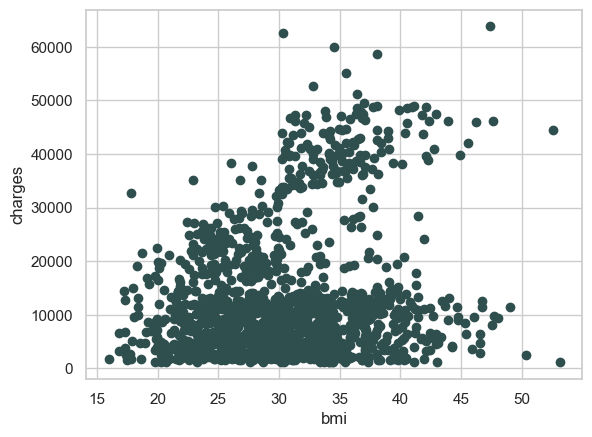

In [32]:
plt.scatter(insurance['bmi'], insurance['charges'], marker='o', color='darkslategray')
plt.xlabel('bmi')
plt.ylabel('charges')

plt.show()
plt.close()

A bit hard to see with so many data points, but again we don't see much of a correlation here, at least not a linear one. Would it be more interesting to look at how age affects bmi?

$Age$ vs $bmi$

I want to look at how age might affect bmi. I predict that people on the lower and higher ends of the spectrum of age will have higher bmi than people in their 30s and 40s. We have two numeric variables, and I will compare the ages here and not age groups. Let's start with some descriptive statistics/correlation coefficients.

In [33]:
print('r =', stats.pearsonr(insurance['age'], insurance['bmi'])[0])
print('rho =', stats.spearmanr(insurance['age'], insurance['bmi'])[0])

r = 0.10927188154853518
rho = 0.10773603532023862


Again we don't see much correlation between age and bmi, which is surprising to me. Children typically have high bmi during puberty and as young adults. Since the minimum age is only 18, this might be why we are not seeing as high of a correlation. We can look at a scatter plot as well here.

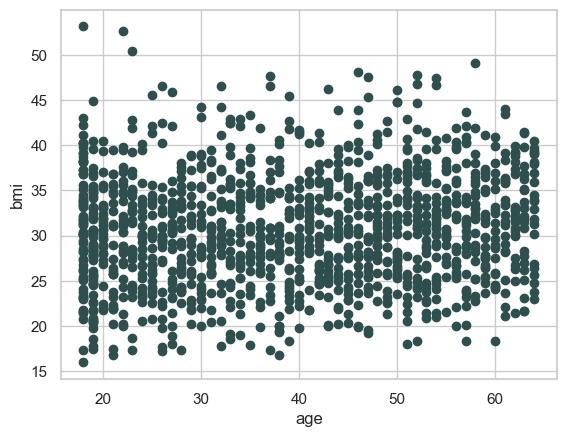

In [34]:
plt.scatter(insurance['age'], insurance['bmi'], marker='o', color='darkslategray')
plt.xlabel('age')
plt.ylabel('bmi')

plt.show()
plt.close()

We see a pretty even distribution here, so it looks like our correlation coefficients are correct, that there doesn't seem to be much influence on how age affects bmi.

$Smoker$ vs $Charges$

Finally, we can look at how smoking affects charges. I believe smokers will have higher charges than non-smokers.

In [35]:
smokers = insurance.groupby('smoker')
data = smokers['charges'].describe().transpose()
data

smoker,no,yes
count,1064.000000,274.000000
mean,8434.268298,32050.231832
std,5993.781819,11541.547176
min,1121.873900,12829.455100
25%,3986.438700,20826.244213
50%,7345.405300,34456.348450
75%,11362.887050,41019.207275
max,36910.608030,63770.428010


We can see a stark contrast here between smokers and non-smokers. The mean for smokers is 32,050, while the mean charges for non-smokers is only 8,434. We also see that the median for smokers is a whopping 34,456, while for non-smokers is 7,345. For comparison, the max charges for non-smokers is only 36,910, about the same as the median for smokers!

Let's try looking at small multiples to compare charges for smokers and non-smokers.

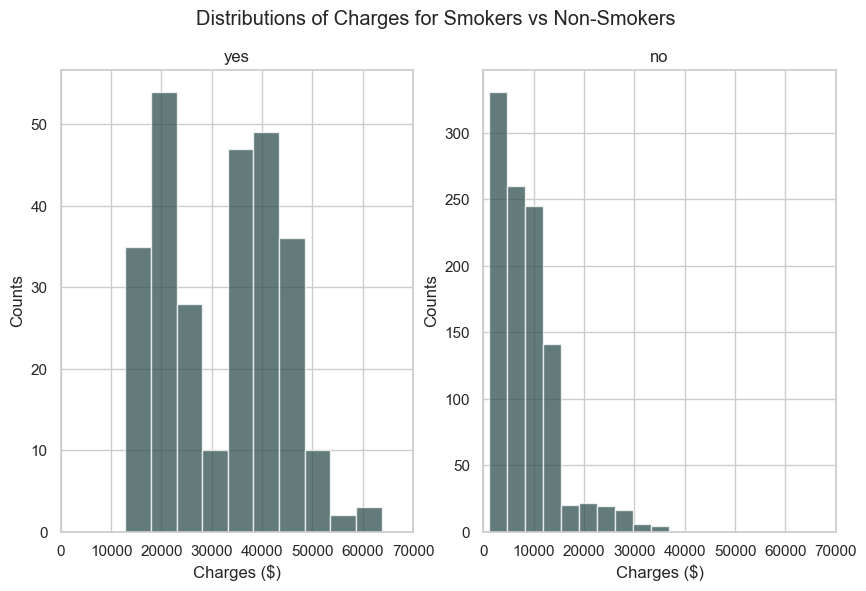

In [36]:
labels = pd.unique(insurance['smoker'].values)
grouped = smokers

figure = plt.figure(figsize=(10,6))
figure.suptitle('Distributions of Charges for Smokers vs Non-Smokers')

for i,x in enumerate(labels):
    axes = figure.add_subplot(1,2, i+1)
    subdata = grouped['charges'].get_group(x).values
    axes.hist(subdata, alpha=0.75, color='darkslategray')
    axes.set_title(x)
    axes.set_xlim((0,70000))
    axes.set_xlabel('Charges ($)')
    axes.set_ylabel('Counts')
plt.show()
plt.close()

Again we see the stark differences in this chart. The charges for non-smokers has a right skew, as the distribution is on the lower end of the charges, while smokers have a distribution that is more evenly spread over the full range of charges. Why are the charges so much higher for smokers? Does age influence smoking? Because smokers have a shorter life expectancy than non-smokers, should we look at how age might affect smoking?

$Conclusion$

We asked a lot of questions through this exploratory data analysis, and we can answer five of them here.

1. Why do smokers have higher charges than non-smokers?

The answer seems obvious - smokers have a shorter life expectancy, and are more likely to have health issues compared to non-smoker. They might also be more inclined to engage in other vices like drinking or gambling, which can increase stress levels.

2. Does a person's age affect how many children they might have?

As we saw in the pairwise analysis, age and children do not seem to have a high correlation. I believe there are other factors not presented here that influence how many children a person has, such as income status.

3. Is bmi affected by age?

Again, we didn't see a high correlation here. It would be interesting to look at people aged 10-18 to see if age has more influence on bmi in that age group.

4. Does sex affect charges?

As we saw in the pairwise analysis, men had slightly higher charges than women, but there was not enough of a difference to determine that sex plays a big role in a person's charges.

5. Overall, what are the factors influencing charges?

Based on the EDA, it looks like smoking has the biggest influence on increasing a person's charges. We didn't see much correlation with some of the other variables, altough men did have somewhat higher charges than women. It would make sense, therefore, that men who smoke probably have much higher insurance charges than women who do not smoke. We would have to look at some more pairwise relationships to get a better understanding.